# Import importance lib

In [80]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create sequential model

In [81]:
model = keras.Sequential()
model.add(keras.Input(shape=(9,)))

model.add(layers.Dense(128,activation="relu", name="H_layer1"))
model.add(layers.Dense(128,activation="relu", name="H_Layer2"))

model.add(layers.Dense(2,activation="relu", name="Output_layer"))

In [82]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ H_layer1 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ H_Layer2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,050 (70.51 KB)

 Trainable params: 18,050 (70.51 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer="sgd",loss='mse')

# Load train data

<ul>
<li>X_train : [[IR0, IR1, IR2, IR3, IR4, IR5, IR6 ,IR7,Smell],,,,]</li>
<li>Y_train : [[Turn ,Move],,,,]</li>
</ul>

In [84]:
# #moc data
# X_train = [[1,2,3,4,5,6,7,8,9],[4,3,7,5,4,8,4,3,2]]
# Y_train = [[3,2],[1,6]]
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)

In [85]:
# df = pd.DataFrame(columns=['IR0','IR1','IR2','IR3','IR4','IR5','IR6','IR7','Smell','Turn','Move'])
# df.to_csv('./csv/irp_ann.csv')

In [86]:
df2 = pd.read_csv('./csv/history_all.csv')

In [87]:
df2.head(5)

,ir0,ir1,ir2,ir3,ir4,ir5,ir6,ir7,angle,turn,move
0,100.0,46.568542,100.0,32.426407,20.0,32.426407,20.0,32.426407,46.735705,0,5
1,100.0,39.497475,100.0,39.497475,25.0,32.426407,20.0,32.426407,47.035034,0,5
2,100.0,32.426407,100.0,46.568542,30.0,32.426407,20.0,32.426407,47.337306,0,5
3,100.0,32.426407,100.0,53.639610,35.0,32.426407,20.0,32.426407,47.642545,0,5
4,100.0,32.426407,100.0,60.710678,40.0,32.426407,20.0,32.426407,47.950779,0,5


In [88]:
df = pd.read_csv("./csv/irp_ann.csv")

In [89]:
df = df.drop_duplicates()

In [90]:
df = df.drop(columns=['Unnamed: 0'])

In [91]:
for i in range(0,8):
    df[f"IR{i}"] = df[f"IR{i}"]/100

In [92]:
df['Smell'] = df['Smell']/360
df['Turn'] = df['Turn']/360
df['Move'] = df['Move']/100

In [93]:
# df.head(4)

In [94]:
# df.info()

In [95]:
X = df.drop(columns=['Turn','Move'])

In [96]:
y = df[['Turn','Move']]

In [97]:
# X = df2.drop(columns=['turn','move'])
# X = X/100

In [98]:
# y = df2[['turn','move']]
# y = y/100

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Train model

In [100]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=256,epochs=600)

Epoch 1/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 - val_loss: 0.0101
Epoch 2/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - val_loss: 0.0098
Epoch 3/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090 - val_loss: 0.0097
Epoch 4/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0097
Epoch 5/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0096
Epoch 6/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0096
Epoch 7/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0096
Epoch 8/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - val_loss: 0.0095
Epoch 9/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0094
Epoch 10/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - val_loss: 0.0093
Epoch 11/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 - val_loss: 0.0090
Epoch 12/600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

# Model evaluate

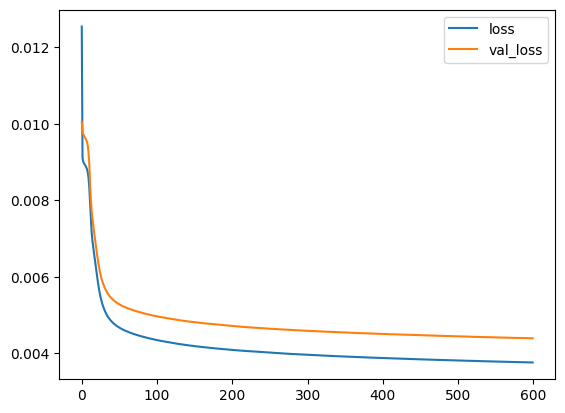

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

# Model predict

In [102]:
model.predict(np.array([[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.08027599, 0.05694187]], dtype=float32)

# Save model

In [103]:
model.save('./model/irp_ANN.keras')

# Load model and predict

In [104]:
load = keras.models.load_model('./model/irp_ANN.keras')

In [105]:
load.predict(np.array([[1,2,3,4,5,6,7,8,9]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[1.3250774, 0.       ]], dtype=float32)